In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

from utils import squeeze, make_spec_ds

seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

data_dir = "./data/"

# Train-validation split
train_ds, val_ds = tf.keras.utils.audio_dataset_from_directory(
    directory=data_dir,
    batch_size=64,
    validation_split=0.2,
    seed=0,
    output_sequence_length=16000,
    subset="both",
)

label_names = np.array(train_ds.class_names)
val_ds = val_ds.map(squeeze, tf.data.AUTOTUNE)

# Test-validation split
test_ds = val_ds.shard(num_shards=2, index=0)
val_ds = val_ds.shard(num_shards=2, index=1)

# Testing dataset
test_spectrogram_ds = make_spec_ds(test_ds)

2023-12-19 23:01:10.803501: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-19 23:01:11.027400: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-19 23:01:11.027557: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-19 23:01:11.065706: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-19 23:01:11.361552: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-19 23:01:11.365528: I tensorflow/core/platform/cpu_feature_guard.cc:1

Found 64727 files belonging to 31 classes.
Using 51782 files for training.
Using 12945 files for validation.


# Model1

In [2]:
model1_dir = "./models/model_best_1.h5"
model1 = tf.keras.saving.load_model(model1_dir)

In [3]:
metrics = model1.evaluate(test_spectrogram_ds, return_dict=True)
loss = round((metrics["loss"]*100), 2)
acc = round((metrics["accuracy"]*100), 2)

print(f"Model1 returned {loss}% loss and {acc}% accuracy.")

102/102 [==============================] - 8s 66ms/step - loss: 0.3007 - accuracy: 0.9221
Model1 returned 30.07% loss and 92.21% accuracy.


102/102 [==============================] - 9s 74ms/step


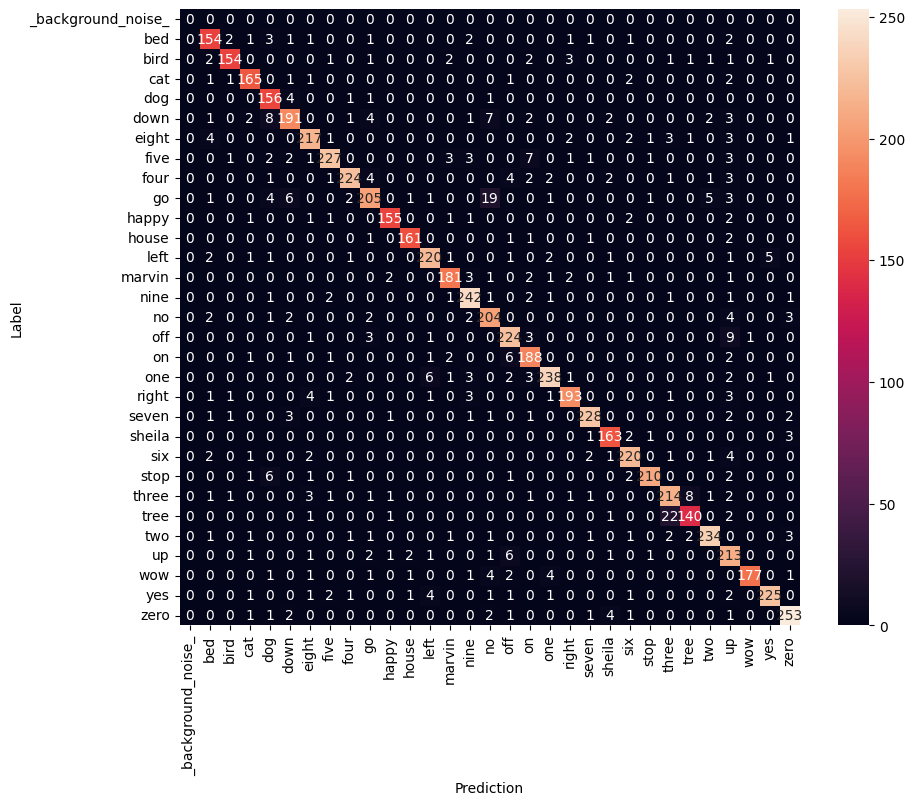

In [4]:
y_pred = model1.predict(test_spectrogram_ds)
y_pred = tf.argmax(y_pred, axis=1)
y_true = tf.concat(list(test_spectrogram_ds.map(lambda s,lab: lab)), axis=0)

confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels=label_names,
            yticklabels=label_names,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

# Model2

In [5]:
model2_dir = "./models/model_best_2.h5"
model2 = tf.keras.saving.load_model(model2_dir)

In [6]:
metrics = model2.evaluate(test_spectrogram_ds, return_dict=True)
loss = round((metrics["loss"]*100), 2)
acc = round((metrics["accuracy"]*100), 2)

print(f"Model2 returned {loss}% loss and {acc}% accuracy.")

102/102 [==============================] - 12s 109ms/step - loss: 0.3673 - accuracy: 0.9224
Model2 returned 36.73% loss and 92.24% accuracy.


102/102 [==============================] - 10s 82ms/step


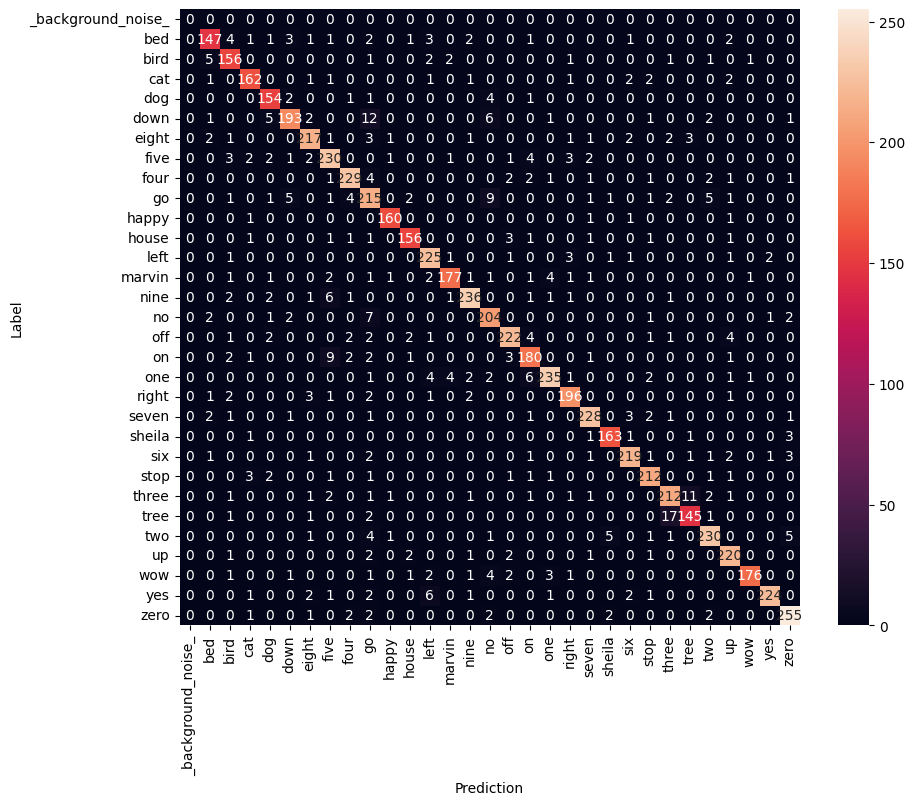

In [7]:
y_pred = model2.predict(test_spectrogram_ds)
y_pred = tf.argmax(y_pred, axis=1)
y_true = tf.concat(list(test_spectrogram_ds.map(lambda s,lab: lab)), axis=0)

confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels=label_names,
            yticklabels=label_names,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

# Model3

In [8]:
model3_dir = "./models/model_best_3.h5"
model3 = tf.keras.saving.load_model(model3_dir)

In [9]:
metrics = model3.evaluate(test_spectrogram_ds, return_dict=True)
loss = round((metrics["loss"]*100), 2)
acc = round((metrics["accuracy"]*100), 2)

print(f"Model3 returned {loss}% loss and {acc}% accuracy.")

102/102 [==============================] - 10s 84ms/step - loss: 0.3468 - accuracy: 0.9170
Model3 returned 34.68% loss and 91.7% accuracy.


102/102 [==============================] - 8s 68ms/step


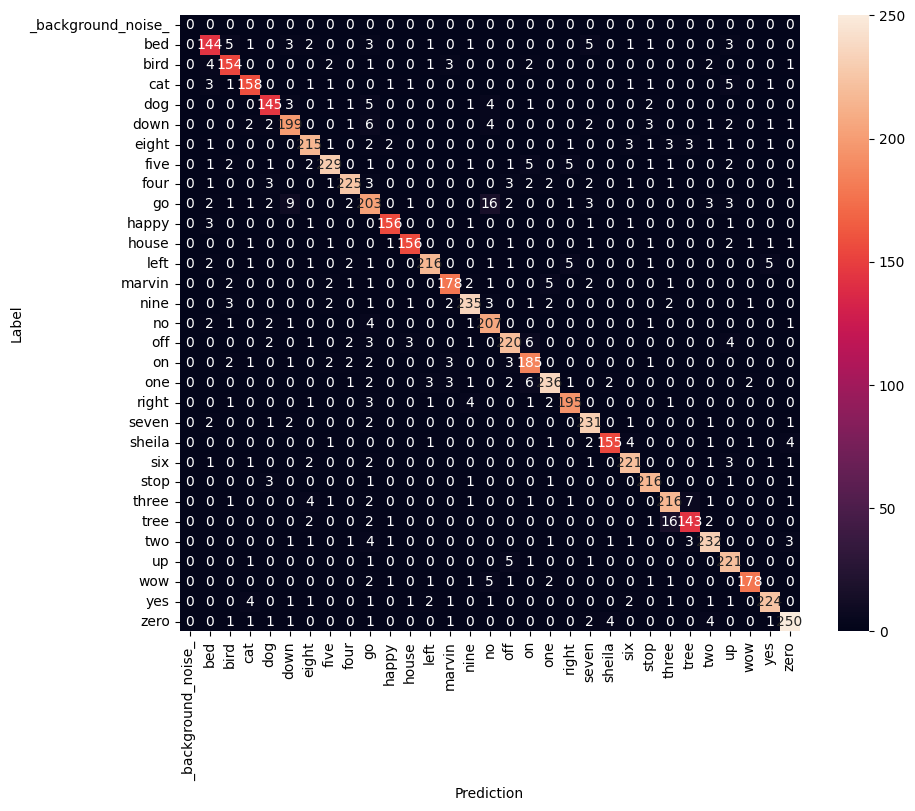

In [10]:
y_pred = model3.predict(test_spectrogram_ds)
y_pred = tf.argmax(y_pred, axis=1)
y_true = tf.concat(list(test_spectrogram_ds.map(lambda s,lab: lab)), axis=0)

confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels=label_names,
            yticklabels=label_names,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()